In [1]:
import scanpy as sc
import anndata as ad
from scib_metrics.benchmark import Benchmarker
from scib_metrics.benchmark import BatchCorrection

from scib_metrics_new.benchmarked_plot_results_table import plot_results_table_new

import pandas as pd
import numpy as np
import pickle

/usr2/postdoc/ycliu137/.conda/envs/scanpy_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)

In [3]:
DATA_PATH = '/projectnb/czproj/Algorithms/ycliu/Pan_proj/outputs/inte_outputs/PBMC10K_Imbalance/'



# Function: Load data

In [4]:
def load_adata(path):    
    adata = sc.read_h5ad(path +'Harmony_integration.h5ad')
    
    for package in ['Harmony', 'scDiffusion']:
        df = pd.read_csv(path + package + '_matrix.csv', sep='\t', header=None)
        adata.obsm[package] = np.array(df)
    
    adata.obsm['Unintegrated'] = adata.obsm['X_pca']
    
    return adata

# Function: Evaluation

In [5]:
batch_corr = BatchCorrection(pcr_comparison=False)

def evaluate_integration(adata, batch_corr=batch_corr):
    bm = Benchmarker(
        adata,
        batch_key="batch",
        label_key="labels",
        embedding_obsm_keys=['scDiffusion', "Harmony", 'Unintegrated'],
        pre_integrated_embedding_obsm_key='Unintegrated',
        batch_correction_metrics=batch_corr,
        n_jobs=1,
    )
    bm.benchmark()
    
    return bm

# Evaluation

In [6]:
adata = load_adata(path=DATA_PATH)
bm = evaluate_integration(adata)

Computing neighbors:   0%|          | 0/3 [00:00<?, ?it/s]/usr2/postdoc/ycliu137/.conda/envs/scanpy_env/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12040. The TBB threading layer is disabled.
  warnings.warn(problem)
Metrics:   0%|          | 0/10 [00:00<?, ?it/s, Bio conservation: isolated_labels]WARNING:2025-08-01 15:36:47,030:jax._src.xla_bridge:794: An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.

Metrics:  60%|██████    | 6/10 [00:07<00:06,  1.56s/it, Batch correction: kbet_per_label]

INFO     CD4 T cells consists of a single batch or is too small. Skip.                                             
INFO     CD8 T cells consists of a single batch or is too small. Skip.                                             



Metrics:  70%|███████   | 7/10 [00:12<00:06,  2.13s/it, Batch correction: graph_connectivity]/usr2/postdoc/ycliu137/.conda/envs/scanpy_env/lib/python3.10/site-packages/scib_metrics/metrics/_graph_connectivity.py:32: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tab = pd.value_counts(comps)
Embeddings:  33%|███▎      | 1/3 [00:12<00:25, 12.55s/it]
                                                                                             
Metrics:  60%|██████    | 6/10 [00:02<00:02,  1.38it/s, Batch correction: kbet_per_label]

INFO     CD4 T cells consists of a single batch or is too small. Skip.                                             
INFO     CD8 T cells consists of a single batch or is too small. Skip.                                             



Metrics:  70%|███████   | 7/10 [00:04<00:02,  1.47it/s, Batch correction: graph_connectivity]/usr2/postdoc/ycliu137/.conda/envs/scanpy_env/lib/python3.10/site-packages/scib_metrics/metrics/_graph_connectivity.py:32: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tab = pd.value_counts(comps)
Embeddings:  67%|██████▋   | 2/3 [00:17<00:07,  7.97s/it]
                                                                                             
Metrics:  60%|██████    | 6/10 [00:02<00:03,  1.13it/s, Batch correction: kbet_per_label]

INFO     CD4 T cells consists of a single batch or is too small. Skip.                                             
INFO     CD8 T cells consists of a single batch or is too small. Skip.                                             



Metrics:  70%|███████   | 7/10 [00:05<00:02,  1.37it/s, Batch correction: graph_connectivity]/usr2/postdoc/ycliu137/.conda/envs/scanpy_env/lib/python3.10/site-packages/scib_metrics/metrics/_graph_connectivity.py:32: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tab = pd.value_counts(comps)
Embeddings: 100%|██████████| 3/3 [00:22<00:00,  7.53s/it]

                                                                                             

# Visualization

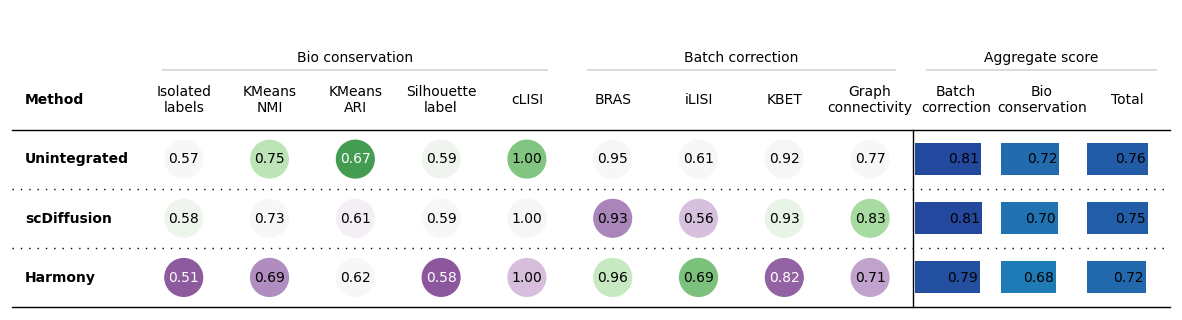

In [7]:
bm.plot_results_table_new = plot_results_table_new
    
bm.plot_results_table(min_max_scale=False)

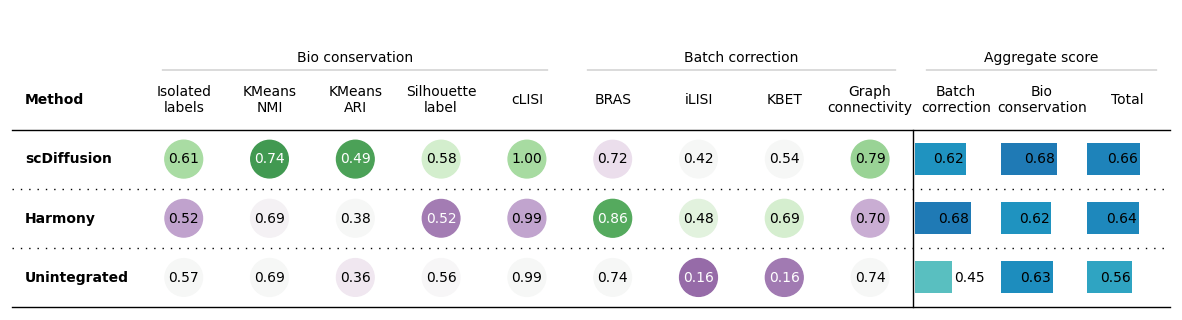

In [16]:
bm.plot_results_table_new = plot_results_table_new
    
bm.plot_results_table(min_max_scale=False)